# Pearson's Correlation

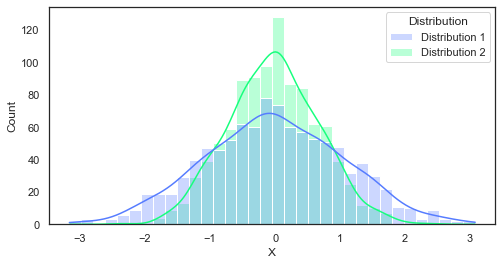

In [81]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np 

mu1, sigma1 = 0, 1.1
normally_distributed_1 = np.random.normal(mu1, sigma1, 1000)

mu2, sigma2 = 0, 0.7
normally_distributed_2 = np.random.normal(mu2, sigma2, 1000)

df_norm = pd.DataFrame({'Distribution':['Distribution 1' for i in range(len(normally_distributed_1))] + ['Distribution 2' for i in range(len(normally_distributed_2))],
                        'X':np.concatenate([normally_distributed_1, normally_distributed_2])})

plt.figure(figsize=(8,4))

palette_dict = {'Distribution 1':'#567CFF',
                'Distribution 2':'#17FF7D'}

ax = sns.histplot(data=df_norm, x="X", hue="Distribution", palette=palette_dict, fill=True, alpha=0.3, kde=True)

plt.savefig('./Pearsons1.png', dpi=300, facecolor='w', bbox_inches = "tight")

In [9]:
p, r = pearsonr(df_norm.loc[df_norm['Distribution'] == 'Distribution 1', 'X'],
                df_norm.loc[df_norm['Distribution'] == 'Distribution 2', 'X'])

print("p-value = %.4f"%p)
print("Correlation coefficient = %.4f"%r)

p-value = 0.0027
Correlation coefficient = 0.9327


<AxesSubplot:>

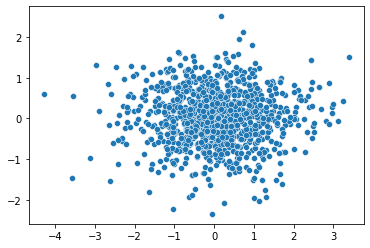

In [13]:
sns.scatterplot(x=normally_distributed_1,
                y=normally_distributed_2)

In [39]:
import statsmodels.api as sm

df_cars = sm.datasets.get_rdataset("mtcars", "datasets").data

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


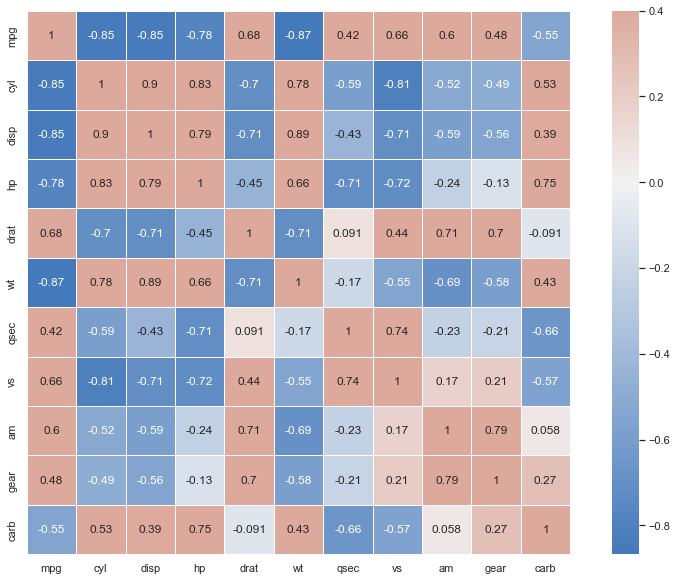

In [82]:
sns.set_theme(style="white")

corr = df_cars.corr()

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(250, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5, annot=True)

plt.savefig('./CorrPlot.png', dpi=300, facecolor='w', bbox_inches = "tight")

In [41]:
df_cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [ ]:
from statsmodels.stats.power import TTestIndPower 
import statsmodels.api as sm 
import numpy as np 
import math 
  
df_prof = sm.datasets.get_rdataset("Salaries", "carData").data 
  
df_prof_A = df_prof.loc[df_prof['discipline'] == 'A'] 
df_prof_B = df_prof.loc[df_prof['discipline'] == 'B'] 
  
df_duncan = sm.datasets.get_rdataset("Duncan", "carData").data 
  
df_duncan.loc[df_duncan['type'] == 'prof', 'type'] = 'professional' 
df_duncan.loc[df_duncan['type'] == 'wc', 'type'] = 'white-collar' 
df_duncan.loc[df_duncan['type'] == 'bc', 'type'] = 'blue-collar' 
  
df_professional = df_duncan.loc[(df_duncan['type'] == 'professional')] 
df_blue_collar = df_duncan.loc[(df_duncan['type'] == 'blue-collar')] 
  
def pooled_standard_deviation(dataset1, dataset2, column) -> float: 
    pooledSD = math.sqrt(((len(dataset1) - 1)*(dataset1[column].std()**2) + 
                          (len(dataset2) - 1)*(dataset2[column].std()**2)) / (len(dataset1) + len(dataset2) - 2)) 
    return pooledSD; 

